In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [2]:
#read the csv file into a data frame
data=pd.read_csv('survey lung cancer.csv')
print('Dataset :',data.shape)

Dataset : (309, 16)


In [3]:
#information on data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [4]:
#display 10 records from the data set
data[0:10]

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


In [5]:
data.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [6]:
#Checking for Duplicates
data.duplicated().sum()

33

In [7]:
#Removing Duplicates
data=data.drop_duplicates()
data.shape

(276, 16)

In [8]:
#statistics for each column
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,62.909420,1.543478,1.576087,1.496377,1.507246,1.521739,1.663043,1.547101,1.547101,1.550725,1.576087,1.630435,1.467391,1.557971
std,8.379355,0.499011,0.495075,0.500895,0.500856,0.500435,0.473529,0.498681,0.498681,0.498324,0.495075,0.483564,0.499842,0.497530
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.500000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [9]:
#Converting YES Value to 1 and for GENDER Male Value to 1
le=preprocessing.LabelEncoder()
data['GENDER']=le.fit_transform(data['GENDER'])
data['LUNG_CANCER']=le.fit_transform(data['LUNG_CANCER'])
data['SMOKING']=le.fit_transform(data['SMOKING'])
data['YELLOW_FINGERS']=le.fit_transform(data['YELLOW_FINGERS'])
data['ANXIETY']=le.fit_transform(data['ANXIETY'])
data['PEER_PRESSURE']=le.fit_transform(data['PEER_PRESSURE'])
data['CHRONIC DISEASE']=le.fit_transform(data['CHRONIC DISEASE'])
data['FATIGUE ']=le.fit_transform(data['FATIGUE '])
data['ALLERGY ']=le.fit_transform(data['ALLERGY '])
data['WHEEZING']=le.fit_transform(data['WHEEZING'])
data['ALCOHOL CONSUMING']=le.fit_transform(data['ALCOHOL CONSUMING'])
data['COUGHING']=le.fit_transform(data['COUGHING'])
data['SHORTNESS OF BREATH']=le.fit_transform(data['SHORTNESS OF BREATH'])
data['SWALLOWING DIFFICULTY']=le.fit_transform(data['SWALLOWING DIFFICULTY'])
data['CHEST PAIN']=le.fit_transform(data['CHEST PAIN'])
data['LUNG_CANCER']=le.fit_transform(data['LUNG_CANCER'])
data

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,0,59,0,1,1,1,0,0,1,1,0,1,0,1,0,1
280,0,59,1,0,0,0,1,1,1,0,0,0,1,0,0,0
281,1,55,1,0,0,0,0,1,1,0,0,0,1,0,1,0
282,1,46,0,1,1,0,0,0,0,0,0,0,0,1,1,0


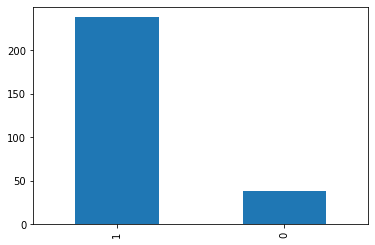

In [10]:
# Distribution of diagnosis
data.LUNG_CANCER.value_counts()[0:30].plot(kind='bar')
plt.show()

In [11]:
data['LUNG_CANCER'].value_counts()

1    238
0     38
Name: LUNG_CANCER, dtype: int64

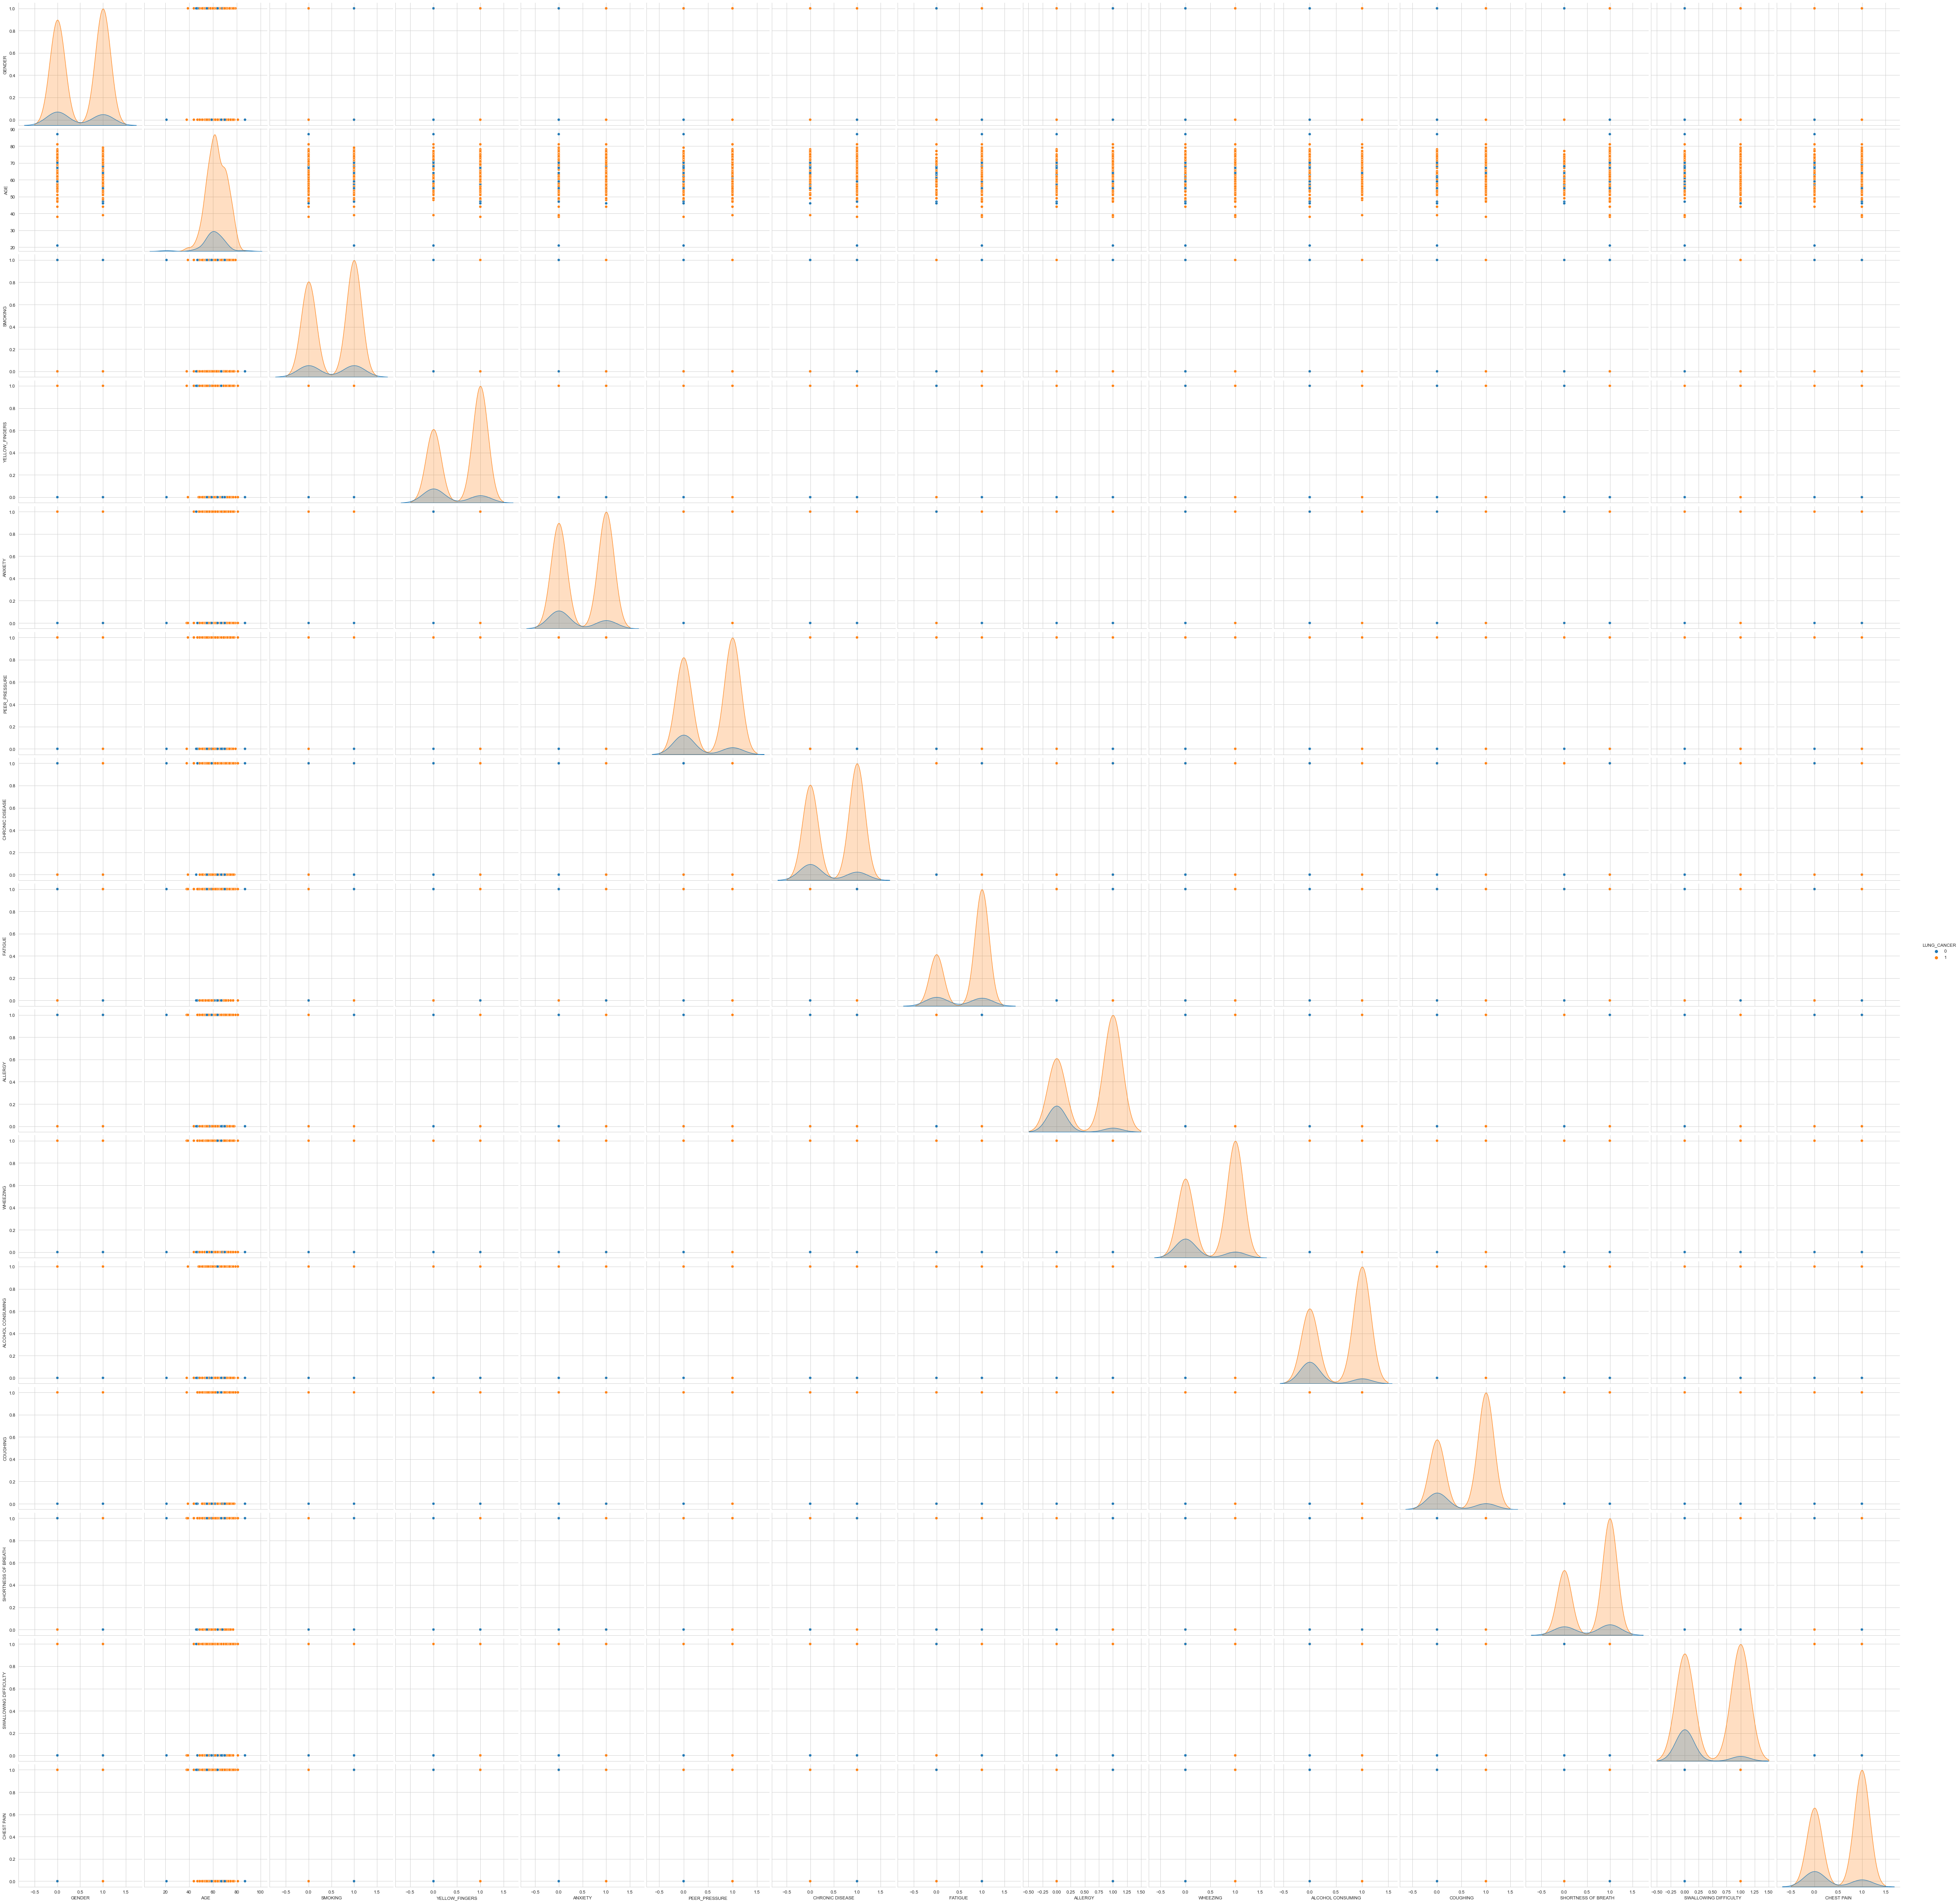

In [12]:
sns.set_style("whitegrid")
sns.pairplot(data,hue="LUNG_CANCER",size=4);
plt.show()

In [13]:
#From the visualizations, it is clear that in the given dataset, the features GENDER, AGE, SMOKING and SHORTNESS OF BREATH don't have that much relationship with LUNG CANCER.
#So let's drop those features to make this dataset more clean.
data_clean=data.drop(columns=['GENDER','AGE', 'SMOKING', 'SHORTNESS OF BREATH'])
data_clean

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,1,0,0,1,0,1,1,1,1,1,1
1,0,0,0,1,1,1,0,0,0,1,1,1
2,0,0,1,0,1,0,1,0,1,0,1,0
3,1,1,0,0,0,0,0,1,0,1,1,0
4,1,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,1,1,0,0,1,1,0,1,1,0,1
280,0,0,0,1,1,1,0,0,0,0,0,0
281,0,0,0,0,1,1,0,0,0,0,1,0
282,1,1,0,0,0,0,0,0,0,1,1,0


In [14]:
#Finding Correlation
cn=data_clean.corr()
cn

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
YELLOW_FINGERS,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,0.333349,-0.099169,0.189192
ANXIETY,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,0.478820,-0.123182,0.144322
PEER_PRESSURE,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.037769,-0.132603,-0.068224,0.327764,-0.074655,0.195086
CHRONIC DISEASE,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,0.068263,-0.048895,0.143692
FATIGUE,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,-0.115727,0.013757,0.160078
ALLERGY,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.037581,0.245440,0.333552
WHEEZING,-0.058756,-0.174009,-0.037769,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.108304,0.142846,0.249054
ALCOHOL CONSUMING,-0.273643,-0.152228,-0.132603,0.010144,-0.181573,0.378125,0.261061,1.000000,0.198023,-0.000635,0.310767,0.294422
COUGHING,0.020803,-0.218843,-0.068224,-0.160813,0.148538,0.206367,0.353657,0.198023,1.000000,-0.136885,0.077988,0.253027
SWALLOWING DIFFICULTY,0.333349,0.478820,0.327764,0.068263,-0.115727,-0.037581,0.108304,-0.000635,-0.136885,1.000000,0.102674,0.268940


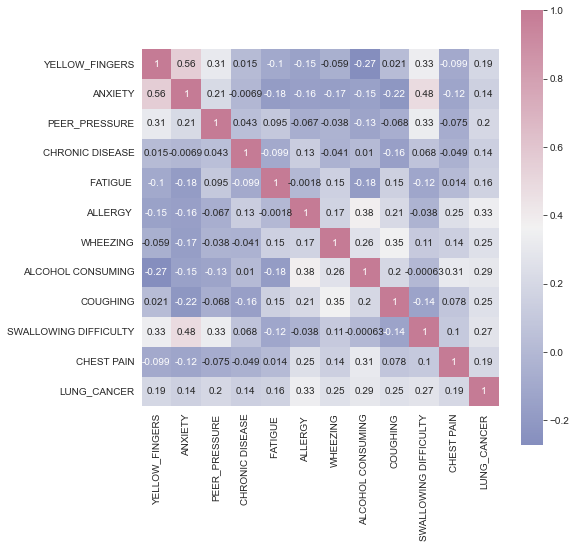

In [15]:
#finding correlation using heat map

cmap=sns.diverging_palette(260,-10,s=40, l=60, n=6,as_cmap=True)
plt.subplots(figsize=(8,8))
sns.heatmap(cn,cmap=cmap,annot=True, square=True)
plt.show()

In [16]:
#Feature Selection
#The correlation matrix shows that ANXIETY and YELLOW_FINGERS are correlated more than 50% and Anxiety and Swallowing Difficulty
# are correlated more than 45%. So, lets create a new feature combining them.
data_clean['ANXYELFIN']=data_clean['ANXIETY']*data_clean['YELLOW_FINGERS']
data_clean['ANXSWADIF']=data_clean['ANXIETY']*data_clean['SWALLOWING DIFFICULTY']
data_clean

,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,ANXYELFIN,ANXSWADIF
0,1,1,0,0,1,0,1,1,1,1,1,1,1,1
1,0,0,0,1,1,1,0,0,0,1,1,1,0,0
2,0,0,1,0,1,0,1,0,1,0,1,0,0,0
3,1,1,0,0,0,0,0,1,0,1,1,0,1,1
4,1,0,0,0,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,1,1,0,0,1,1,0,1,1,0,1,1,1
280,0,0,0,1,1,1,0,0,0,0,0,0,0,0
281,0,0,0,0,1,1,0,0,0,0,1,0,0,0
282,1,1,0,0,0,0,0,0,0,1,1,0,1,1


In [17]:
#Splitting independent and dependent variables
X = data_clean.drop('LUNG_CANCER', axis = 1)
y = data_clean['LUNG_CANCER']

#Target Distribution Imbalance Handling
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(random_state=42)
X, y = adasyn.fit_resample(X, y)

In [18]:
#Splitting data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y,test_size= 0.3,random_state=0)
print('X train shape: ', X_train.shape)
print('Y train shape: ', y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', y_test.shape)

X train shape:  (329, 13)
Y train shape:  (329,)
X test shape:  (142, 13)
Y test shape:  (142,)


In [19]:
from sklearn.metrics import confusion_matrix    
#function to create confusion matrix taking title as input parameter for different regression methods
def fn_confusion_matrix(plot_title):
    logreg_cm = confusion_matrix(y_test, Y_predict1)
    f, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(logreg_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
    plt.title(' Classification Confusion Matrix for {}'.format(str(plot_title)))
    plt.xlabel('Y predict')
    plt.ylabel('Y test')
    plt.show()

In [20]:
#Logistic regression model
from sklearn.linear_model import LogisticRegression

# We defining the model
logreg = LogisticRegression(C=10)

# We train the model
logreg.fit(X_train, y_train)

# We predict target values
Y_predict1 = logreg.predict(X_test)

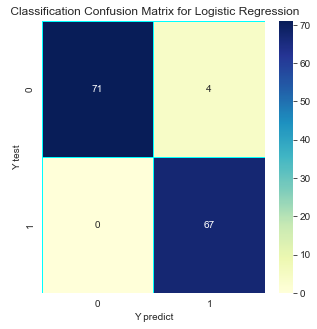

In [21]:
fn_confusion_matrix('Logistic Regression')

In [22]:
# Test score
score_logreg = logreg.score(X_test, y_test)
print(score_logreg)

0.971830985915493


In [23]:
#Support Vector Machine
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

# We define the SVM model
svmcla = OneVsRestClassifier(BaggingClassifier(SVC(C=10,kernel='rbf',random_state=9, probability=True), 
                                               n_jobs=-1))

# We train model
svmcla.fit(X_train, y_train)

# We predict target values
Y_predict2 = svmcla.predict(X_test)

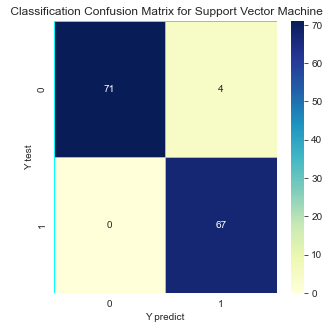

In [24]:
fn_confusion_matrix('Support Vector Machine')

In [25]:
# Test score
score_svmcla = logreg.score(X_test, y_test)
print(score_svmcla)

0.971830985915493


In [26]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

# We define the model
dtcla = DecisionTreeClassifier(random_state=9)

# We train model
dtcla.fit(X_train, y_train)

# We predict target values
Y_predict4 = dtcla.predict(X_test)

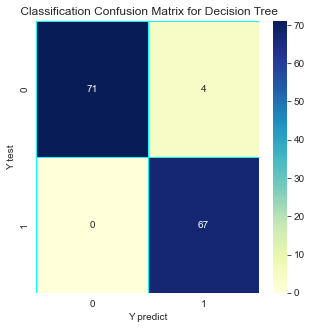

In [27]:
fn_confusion_matrix('Decision Tree')

In [28]:
# Test score
score_dtcla = logreg.score(X_test, y_test)
print(score_dtcla)

0.971830985915493


In [29]:
#Naive bayes classification
from sklearn.naive_bayes import GaussianNB

# We define the model
nbcla = GaussianNB()

# We train model
nbcla.fit(X_train, y_train)

# We predict target values
Y_predict3 = nbcla.predict(X_test)

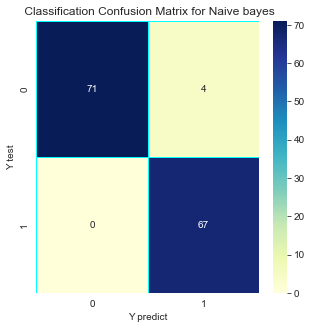

In [30]:
fn_confusion_matrix('Naive bayes')

In [31]:
# Test score
score_nbcla = logreg.score(X_test, y_test)
print(score_nbcla)

0.971830985915493


In [32]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier

# We define the model
rfcla = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=-1)

# We train model
rfcla.fit(X_train, y_train)

# We predict target values
Y_predict5 = rfcla.predict(X_test)

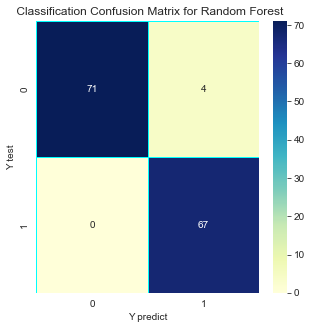

In [33]:
fn_confusion_matrix('Random Forest')

In [34]:
# Test score
score_rfcla = rfcla.score(X_test, y_test)
print(score_rfcla)

0.9859154929577465


In [35]:
#K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

# We define the model
knncla = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

# We train model
knncla.fit(X_train, y_train)

# We predict target values
Y_predict6 = knncla.predict(X_test)

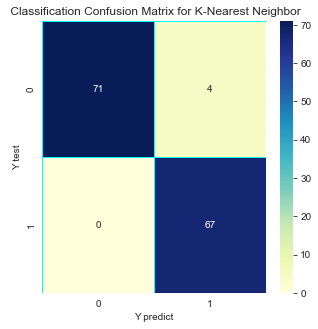

In [36]:
fn_confusion_matrix('K-Nearest Neighbor')

In [37]:
# Test score
score_knncla= knncla.score(X_test, y_test)
print(score_knncla)

0.9788732394366197


In [38]:
Testscores = pd.Series([score_logreg, score_svmcla, score_dtcla,score_nbcla,score_rfcla,score_knncla], 
                        index=['Logistic Regression Score', 'Support Vector Machine Score', 'Decision Tree Score','Naive Bayes Score',
                              'Random Forest Score','K-Nearest Neighbor Score']) 
print(Testscores)

Logistic Regression Score       0.971831
Support Vector Machine Score    0.971831
Decision Tree Score             0.971831
Naive Bayes Score               0.971831
Random Forest Score             0.985915
K-Nearest Neighbor Score        0.978873
dtype: float64


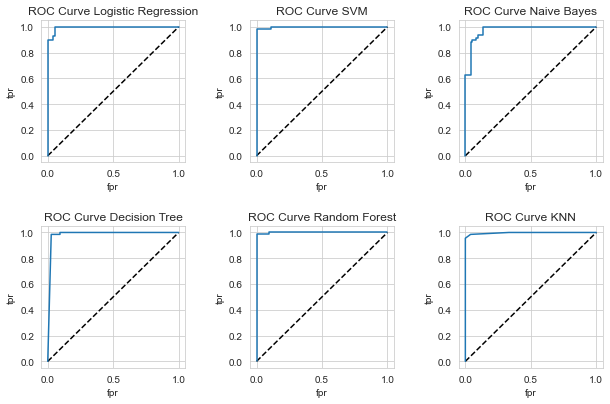

In [39]:
from sklearn.metrics import roc_curve

# Logistic Regression Classification
Y_predict1_proba = logreg.predict_proba(X_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict1_proba)
plt.subplot(331)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Logistic Regression')
plt.grid(True)

# SVM Classification
Y_predict2_proba = svmcla.predict_proba(X_test)
Y_predict2_proba = Y_predict2_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict2_proba)
plt.subplot(332)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve SVM')
plt.grid(True)

# Naive Bayes Classification
Y_predict3_proba = nbcla.predict_proba(X_test)
Y_predict3_proba = Y_predict3_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict3_proba)
plt.subplot(333)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Naive Bayes')
plt.grid(True)

# Decision Tree Classification
Y_predict4_proba = dtcla.predict_proba(X_test)
Y_predict4_proba = Y_predict4_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict4_proba)
plt.subplot(334)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Decision Tree')
plt.grid(True)

# Random Forest Classification
Y_predict5_proba = rfcla.predict_proba(X_test)
Y_predict5_proba = Y_predict5_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict5_proba)
plt.subplot(335)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Random Forest')
plt.grid(True)

# KNN Classification
Y_predict6_proba = knncla.predict_proba(X_test)
Y_predict6_proba = Y_predict6_proba[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, Y_predict6_proba)
plt.subplot(336)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve KNN')
plt.grid(True)
plt.subplots_adjust(top=2, bottom=0.08, left=0.10, right=1.4, hspace=0.45, wspace=0.45)
plt.show()
